In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-dark')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [167]:
taxi = pd.read_csv('data/train.csv', nrows = 5_000_000, parse_dates = ['pickup_datetime']).drop(columns = 'key')

print("The training dataset has {} entries.".format(len(taxi)))

The training dataset has 5000000 entries.


In [168]:
test = pd.read_csv('data/test.csv', nrows = 10_000, parse_dates = ['pickup_datetime']).drop(columns = 'key')

print("The testing dataset has {} entries.".format(len(test)))

The testing dataset has 9914 entries.


In [169]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1
1,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1
2,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2
3,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1
4,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1


In [170]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973,40.764,-73.981,40.744,1
1,2015-01-27 13:08:24+00:00,-73.987,40.719,-73.999,40.739,1
2,2011-10-08 11:53:44+00:00,-73.983,40.751,-73.980,40.746,1
3,2012-12-01 21:12:12+00:00,-73.981,40.768,-73.990,40.752,1
4,2012-12-01 21:12:12+00:00,-73.966,40.790,-73.989,40.744,1


In [171]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5000000.000,5000000.000,5000000.000,4999964.000,4999964.000,5000000.000
mean,11.341,-72.507,39.920,-72.507,39.917,1.685
std,9.820,12.810,8.964,12.848,9.487,1.332
min,-100.000,-3426.609,-3488.080,-3412.653,-3488.080,0.000
25%,6.000,-73.992,40.735,-73.991,40.734,1.000
50%,8.500,-73.982,40.753,-73.980,40.753,1.000
75%,12.500,-73.967,40.767,-73.964,40.768,2.000
max,1273.310,3439.426,3310.364,3457.622,3345.917,208.000


In [172]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000,9914.000,9914.000,9914.000,9914.000
mean,-73.975,40.751,-73.974,40.752,1.671
std,0.043,0.034,0.039,0.035,1.279
min,-74.252,40.573,-74.263,40.569,1.000
25%,-73.993,40.736,-73.991,40.735,1.000
50%,-73.982,40.753,-73.980,40.754,1.000
75%,-73.968,40.767,-73.964,40.769,2.000
max,-72.987,41.710,-72.991,41.697,6.000


In [173]:
taxi = taxi[((taxi['pickup_longitude'] > -78) & (taxi['pickup_longitude'] < -70)) &
            ((taxi['dropoff_longitude'] > -78) & (taxi['dropoff_longitude'] < -70)) &
            ((taxi['pickup_latitude'] > 37) & (taxi['pickup_latitude'] < 45)) &
            ((taxi['dropoff_latitude'] > 37) & (taxi['dropoff_latitude'] < 45)) &
            (taxi['passenger_count'] > 0) &
            (taxi['fare_amount'] >= 2.5)]

In [174]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4878498.000,4878498.000,4878498.000,4878498.000,4878498.000,4878498.000
mean,11.333,-73.975,40.751,-73.974,40.751,1.690
std,9.727,0.043,0.034,0.042,0.037,1.314
min,2.500,-77.902,37.031,-77.971,37.031,1.000
25%,6.000,-73.992,40.737,-73.992,40.736,1.000
50%,8.500,-73.982,40.753,-73.981,40.754,1.000
75%,12.500,-73.968,40.768,-73.965,40.768,2.000
max,952.000,-70.000,44.732,-70.002,44.728,208.000


In [175]:
taxi.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

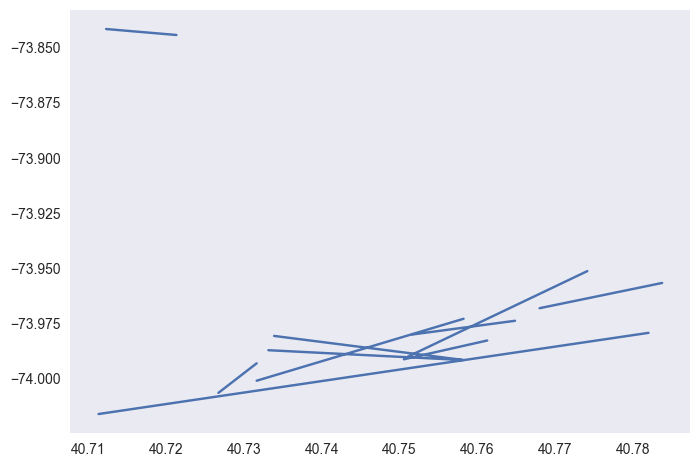

In [176]:
import seaborn as sns

def display(df, num):
    lats = []
    longs = []
    entries = df[df['pickup_longitude'] < -70]
  
    for iter, row in entries[:num].iterrows():
        lats.append(row['pickup_latitude'])
        lats.append(row['dropoff_latitude'])
        lats.append(None)
        
        longs.append(row['pickup_longitude'])
        longs.append(row['dropoff_longitude'])
        longs.append(None)

    plt.plot(lats, longs)

display(taxi, 10)

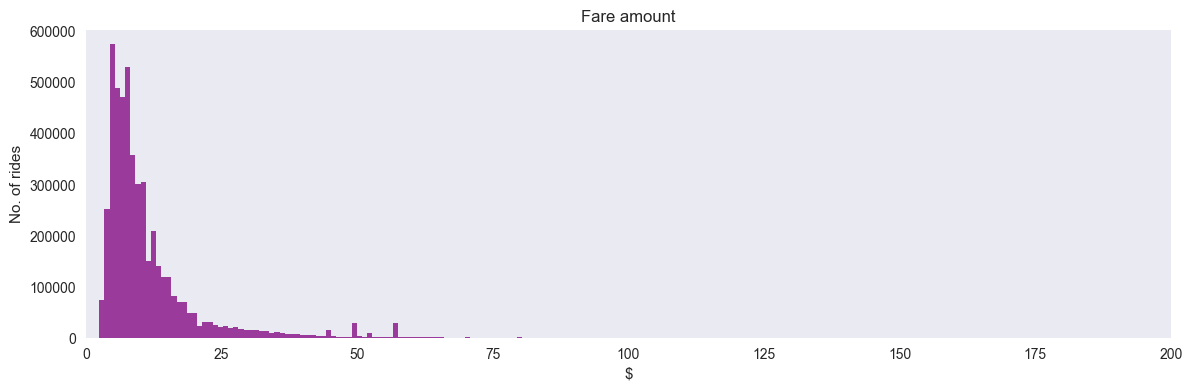

In [177]:
plt.figure(figsize = (14, 4))
n, bins, patches = plt.hist(taxi.fare_amount, 1000, facecolor='purple', alpha=0.75)
plt.xlabel('$')
plt.ylabel('No. of rides')
plt.title('Fare amount')
plt.xlim(0, 200)
plt.show();

In [178]:
taxi.groupby('fare_amount').size().nlargest(10)

fare_amount
6.500     237317
4.500     200433
8.500     183203
5.700     142304
5.300     142293
6.100     138084
4.900     138049
6.900     127239
10.500    124046
7.300     119606
dtype: int64

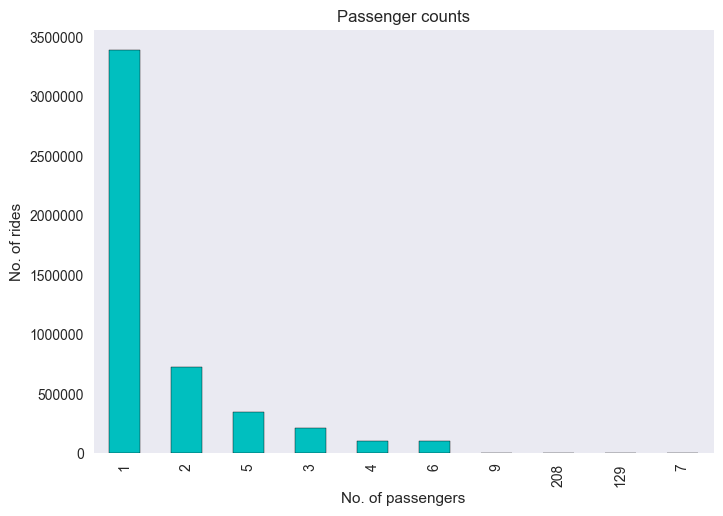

In [179]:
taxi['passenger_count'].value_counts().plot.bar(color='c', edgecolor='k')
plt.title('Passenger counts')
plt.xlabel('No. of passengers')
plt.ylabel('No. of rides')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [180]:
taxi.groupby('passenger_count').size()

passenger_count
1      3386066
2       723885
3       214918
4       103907
5       346169
6       103547
7            1
9            2
129          1
208          2
dtype: int64

In [183]:
taxi = taxi.loc[taxi['passenger_count'] <= 6]

In [184]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(taxi, test_size=0.3, random_state=42)

In [188]:
import numpy as np
import shutil

def distance(lat1, lon1, lat2, lon2):
    dist = np.degrees(np.arccos(np.sin(np.radians(lat1)) *
                                np.sin(np.radians(lat2)) +
                                np.cos(np.radians(lat1)) *
                                np.cos(np.radians(lat2)) *
                                np.cos(np.radians(lon2 - lon1))) * 60 * 1.515 * 1.609344)
    return dist

def estimate_distance(df):
    return distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

def compute_rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted)**2))

def print_rmse(df, rate, name):
    print("{1} RMSE = {0}".format(compute_rmse(df['fare_amount'], rate * estimate_distance(df)), name))

In [189]:
rate = train['fare_amount'].mean() / estimate_distance(train).mean()

print("Rate = ${0}/km".format(rate))
print_rmse(train, rate, 'Train')
print_rmse(test, rate, 'Test')

Rate = $2.5656782139815464/km
Train RMSE = 9.828029000759377
Test RMSE = 10.071417622931989


In [190]:
taxi['year'] = taxi.pickup_datetime.dt.year
taxi['month'] = taxi.pickup_datetime.dt.month
taxi['day'] = taxi.pickup_datetime.dt.day
taxi['weekday'] = taxi.pickup_datetime.dt.weekday
taxi['hour'] = taxi.pickup_datetime.dt.hour

In [191]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
0,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1,2009,6,15,0,17
1,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1,2010,1,5,1,16
2,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,3,0
3,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1,2012,4,21,5,4
4,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,1,7


In [192]:
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    
    return km

taxi['distance'] = haversine_np(taxi['pickup_latitude'], taxi['pickup_longitude'], taxi['dropoff_latitude'] , taxi['dropoff_longitude'])

In [193]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
0,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1,2009,6,15,0,17,0.410
1,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1,2010,1,5,1,16,4.629
2,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,3,0,1.001
3,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1,2012,4,21,5,4,0.910
4,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,1,7,1.361


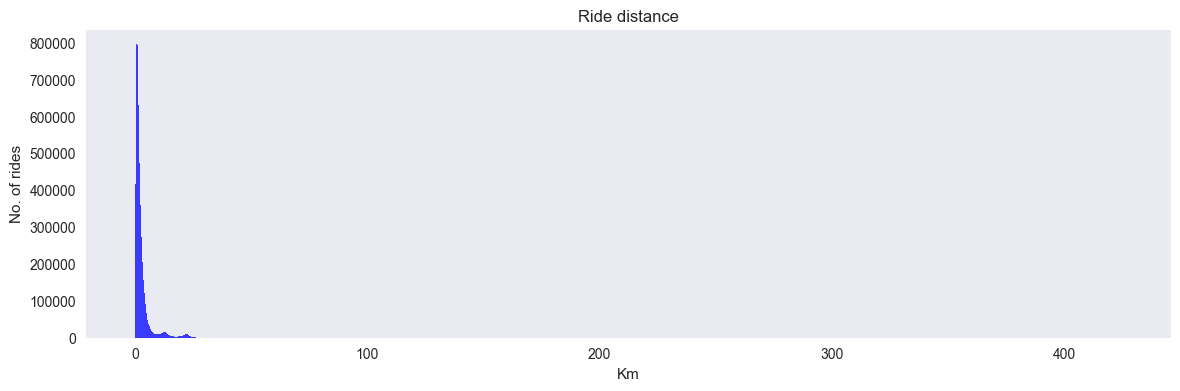

In [195]:
plt.figure(figsize = (14, 4))
n, bins, patches = plt.hist(taxi.distance, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('Km')
plt.ylabel('No. of rides')
plt.title('Ride distance')
plt.show();

In [196]:
taxi['distance'].describe()

count   4878492.000
mean          2.724
std           4.275
min           0.000
25%           0.853
50%           1.552
75%           2.831
max         424.674
Name: distance, dtype: float64

In [197]:
taxi = taxi.loc[taxi['distance'] > 0]

In [198]:
JFK_xy = (40.6413, -73.7781)

pickup_JFK = haversine_np(taxi['pickup_latitude'], taxi['pickup_longitude'], JFK_xy[0], JFK_xy[1]) 
dropoff_JFK = haversine_np(JFK_xy[0], JFK_xy[1], taxi['dropoff_latitude'], taxi['dropoff_longitude'])

In [199]:
taxi['JFK_distance'] = pd.concat([pickup_JFK, dropoff_JFK], axis=1).min(axis=1)

In [200]:
taxi['JFK_distance'].describe()

count   4826440.000
mean         21.001
std           4.558
min           0.021
25%          20.274
50%          22.062
75%          23.150
max         455.905
Name: JFK_distance, dtype: float64

In [201]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance,JFK_distance
0,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1,2009,6,15,0,17,0.410,7.397
1,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1,2010,1,5,1,16,4.629,22.787
2,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,3,0,1.001,23.054
3,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1,2012,4,21,5,4,0.910,23.415
4,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,1,7,1.361,20.336


In [202]:
del taxi['pickup_datetime']

In [204]:
from sklearn.model_selection import train_test_split

y = taxi['fare_amount']
X = taxi.drop(columns=['fare_amount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [205]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [207]:
from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE: 6.067


In [208]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE: 5.665


In [210]:
import lightgbm as lgb

params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }

In [211]:
train_set = lgb.Dataset(X_train, y_train, silent=True)

In [213]:
lb = lgb.train(params, train_set = train_set, num_boost_round=300)

In [214]:
y_pred = lb.predict(X_test, num_iteration = lb.best_iteration)

In [215]:
print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE: 3.729


In [217]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [231]:
def baseline_model():
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [233]:
seed = 7
np.random.seed(seed)

estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

C:\Users\Alina\AppData\Local\Temp\ipykernel_5676\683968365.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)


In [236]:
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
results = cross_val_score(estimator, X.values, y.values, cv=kfold, n_jobs=1)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -29.70 (1.22) MSE


In [237]:
print("RMSE:", np.sqrt(results.std()))

RMSE: 1.1022788721388765
